이전 장에서는 과일 사진을 k-평균 알고리즘을 통해 분류했다. 매일 다양한 과일 사진이 업로드되고 k-평균 알고리즘으로 업로드된 사진을 클러스터로 분류하여 폴더별로 저장했다고 하자. 이러면 어떤 문제가 발생할까? 너무 많은 사진이 등록되어 저장 공간이 부족할 것이다. 이번 장에서는 군집이나 분류에 영향을 끼치지 않고 업로드된 **사진의 용량을 줄여보자**.

지금까지 우리는 데이터가 가진 속성을 '특성'이라고 불렀다. 과일 사진의 경우 10,000개의 픽셀이 있다. 즉, 10,000개의 특성이 있는 셈이다. 머신러닝에서는 이런 특성을 '차원(dimension)'이라고도 부른다. 이 차원을 줄인다면 저장 공간을 크게 절약할 수 있다.

**'차원 축소(dimensionality reduction)'** 알고리즘은 비지도 학습 작업으로 **데이터를 가장 잘 나타내는 일부 특성을 선택해 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시키는 방법**이다.

또한 줄어든 차원에서 다시 원본 차원으로 손실을 최대한 줄이고 복원할 수 있다. 우리는 차원 축소 알고리즘인 **'주성분 분석(principal component analysis)'**를 사용할 것이다. 간단히 **PCA**라고도 부른다.

주성분 분석(PCA)는 **데이터에 있는 분산이 큰 방향을 찾는 것**이다. 분산은 데이터가 널리 펴져있는 정도를 말하며 분산이 큰 방향이란 **데이터를 잘 표현하는 어떤 벡터**라고 생각할 수 있다.

이러한 벡터를 **'주성분(principal component)'**라고 부른다. 이 주성분 벡터는 원본 데이터에 있는 어떤 방향이다. 따라서 주성분 벡터의 원소 개수는 원본 데이터셋에 있는 특성수와 같다. 하지만 원본 데이터는 주성분을 통해 차원을 줄일 수 있다.

정리하면 **주성분은 원본 차원과 같고 주성분으로 바꾼 데이터는 차원이 줄어든다**. 주성분은 가장 분산이 큰 방향이므로 주성분에 투영하여 바꾼 데이터는 원본이 가지고 있는 특성을 잘 나타내고 있을 것이다.

첫 번째 주성분을 찾으면 이 벡터에 수직이고 분산이 가장 큰 다음 방향을 찾는다. 이 벡터가 두 번째 주성분이다.

**일반적으로 주성분은 원본 특성의 개수만큼 찾을 수 있다.**

* 기술적인 이유로 **주성분은 원본 특성의 개수와 샘플 개수 중 작은 값만큼 찾을 수 있다**. 일반적으로 비지도 학습은 데량의 데이터에서 수행하므로 보통 원본 특성의 개수만큼 찾을 수 있다.

과일 사진 데이터를 다운로드하고 넘파이 배열로 적재하자.

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100 * 100)

--2021-09-24 13:34:54--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-09-24 13:34:54--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-09-24 13:34:55--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

사이킷런은 **sklearn.decomposition 모듈 아래에 PCA 클래스**로 주성분 분석 알고리즘을 제공한다. PCA 클래스의 객체를 만들 때 **n_components 매개변수**에 주성분의 개수를 지정해야한다.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)
pca.fit(fruits_2d)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

PCA가 찾은 주성분은 **components_ 속성**에 저장되어 있다. 크기를 확인해보자.

In [ ]:
print(pca.components_.shape)

(50, 10000)


50개의 주성분을 잘 찾은 것 같다. 원본 데이터와 차원이 같으므로 주성분을 100 × 100 크기의 이미지처럼 출력해 볼 수 있다. 이전에 사용했던 draw_fruits() 함수를 이용해 그림을 그려보자.

In [ ]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio = 1):
  n = len(arr) # n은 샘플 개수이다.
  # 한 줄에 10개씩 이미지를 그린다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산한다.
  # ceil은 올림함수이다.
  rows = int(np.ceil(n / 10))
  # 행이 1개이면 열의 개수는 샘플의 개수이다. 그렇지 않으면 10개이다.
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize = (cols * ratio, rows * ratio), squeeze = False)
  # squeeze의 기본값은 True이다.
  # squeeze값이 True이면 우리가 설정한 행과 열이 (1, 2)일때 2차원 배열의 형태가 아니라 (2, )인 1차원 배열로 만든다.
  # 이렇게 되면 아래코드를 사용할 수 없다. 따라서 squeeze를 False로 지정해준다.
  for i in range(rows):
    for j in range(cols):
      if i * 10 + j < n: # n 개까지만 그린다.
        axs[i, j].imshow(arr[i * 10 + j], cmap = 'gray_r')
      axs[i, j].axis('off')
  plt.show()

함수에 넘겨줄 때는 100 × 100 형태로 넘겨줘야한다.

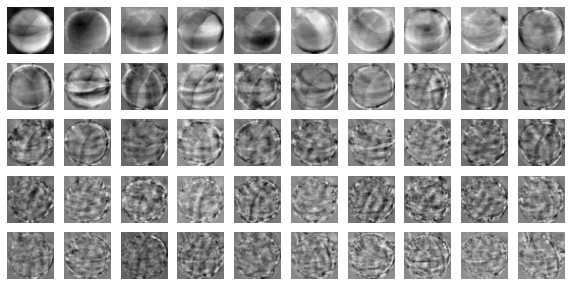

In [ ]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

이 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것이다.

주성분을 찾았으므로 원본 데이터를 주성분에 투영하여 특성의 개수를 10,000개에서 50개로 줄일 수 있다. PCA의 **transform() 메서드**를 사용해 원본 데이터의 차원을 줄여보자.

In [ ]:
print(fruits_2d.shape)

(300, 10000)


In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


fruits_2d의 크기는 (300, 10000)이다. 하지만 PCA 모델을 사용해 변환하니 (300, 50) 크기를 가진 fruits_pca를 만들 수 있었다.

앞에서 10000개의 특성을 50개로 줄였다. 이로 인해 **어느 정도 손실이 발생**할 수밖에 없다. 하지만 최대한 분산이 큰 방향으로 데이터를 투영했기 때문에 원본 데이터를 상당 부분 재구성할 수 있다.

PCA 클래스는 원본 데이터 구성을 위해 **inverse_transform() 메서드**를 제공한다.

In [ ]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


이 데이터를 100 × 100 크기로 바꿔서 100개씩 나누어 출력해보자.

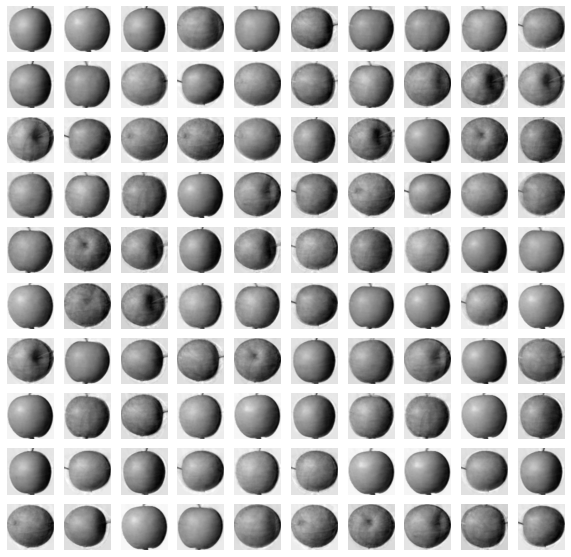

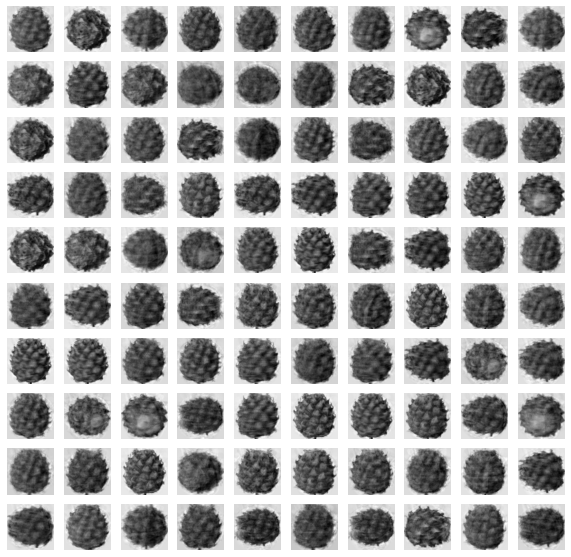

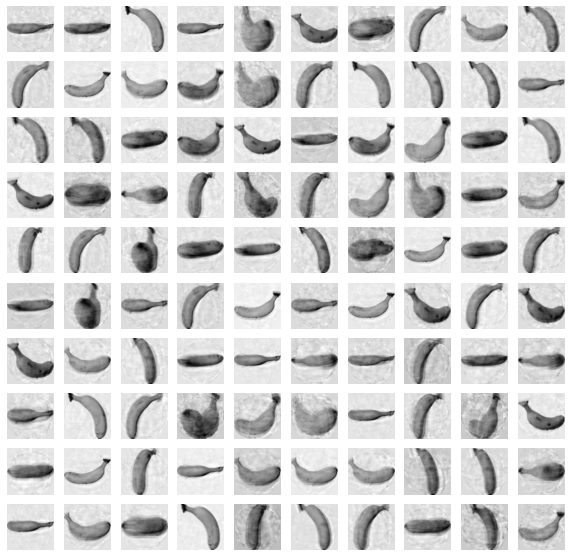

In [ ]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start + 100])
  print('\n')

거의 모든 과일이 잘 복원되었다. 만약 주성분을 최대로 활용했다면 거의 완벽하게 원본 데이터를 재구성할 수 있을 것이다. 이때 50개의 특성은 얼마나 분산을 보존하고있을까?

주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 **'설명된 분산(explained variance)'**라고 한다. PCA 클래스의 **explained_variance_ratio_**에 각 주성분의 설명된 분산 비율이 기록되어있다. 당연히 첫 번째 주성분의 설명된 분산이 가장 크다. 이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있다.

In [ ]:
print(np.sum(pca.explained_variance_ratio_))

0.9215461950670748


92%가 넘는 분산을 유지하고 있다. 설명된 분산의 비율을 그래프로 그려보면 적절한 주성분의 개수를 찾는데 도움이 된다.

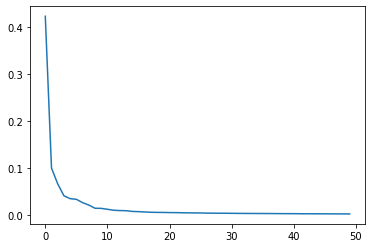

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

처음 10개의 주성분이 대부분의 분산을 표현하고 있다. 그다음부터는 각 주성분이 설명하고 있는 분산은 비교적 작다. 이번에는 PCA로 차원 축소된 데이터를 사용하여 지도 학습 모델을 훈련해보자.

원본 데이터와 축소한 데이터를 지도 학습에 적용해보고 차이점을 확인해보자.

로지스틱 회귀를 적용해보자.

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

지도 학습을 위해서는 타깃값이 필요하다. 타깃 데이터를 만들어주자.

In [ ]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

먼저 원본 데이터 fruits_2d를 사용해 교차 검증을 수행해보자.

In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.351743507385254


특성이 10,000개나 되기 때문에 300개의 샘플에서 금방 과대적합된 모델을 만들기 쉽다.

In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.026691961288452148


50%의 특성만 사용했는데도 정확도가 100%이고 훈련 시간은 전보다 훨씬 감소했다. **PCA로 훈련 데이터를 차원 축소하면 저장 공간뿐만 아니라 머신러닝 모델의 훈련 속도도 높일 수 있다.**

앞서 PCA 클래스를 사용할 때 **n_components 매개변수**에 주성분의 개수를 지정했다. 이 대신 원하는 설명된 분산의 비율을 입력할 수도 있다. PCA클래스는 지정된 비율에 도달할 때까지 자동으로 주성분을 찾는다.

In [ ]:
pca = PCA(n_components = 0.5)
pca.fit(fruits_2d)

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

주성분 개수 대신 0 ~ 1 사이의 비율을 실수로 입력하면 된다. 몇 개의 주성분을 찾았는지 확인해보자.

In [ ]:
print(pca.n_components_)

2


이 모델로 원본 데이터를 변환해보자.

In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


2개의 특성을 이용해 교차 검증을 수행해보자.

In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.044686079025268555


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


* 로지스틱 회귀 모델이 완전히 수렴하지 못하여 Convergence Warning이 발생한다. 하지만 교차 검증의 결과가 충분히 좋아 무시해도 좋다.

2개의 특성을 사용했는데도 99%의 정확도를 달성했다.

이번에는 차원 축소된 데이터를 사용해 k-평균 알고리즘으로 클러스터를 찾아보자.

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts = True))

(array([0, 1, 2], dtype=int32), array([ 91,  99, 110]))


2절에서 원본 데이터를 사용했을 때와 비슷한 결과가 나온다. KMeans가 찾은 레이블을 사용해 과일 이미지를 출력해보자.

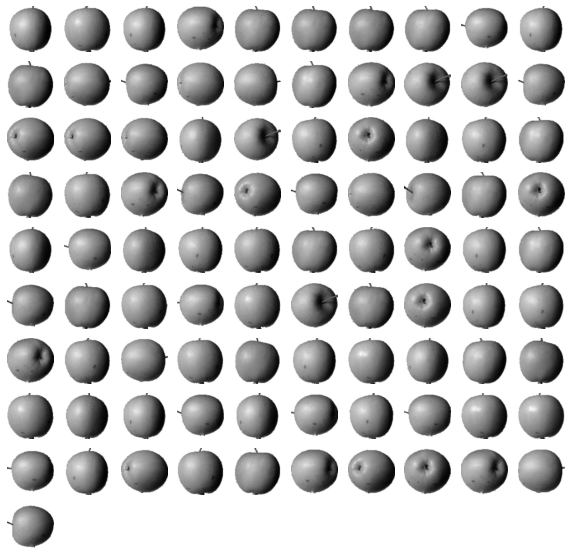

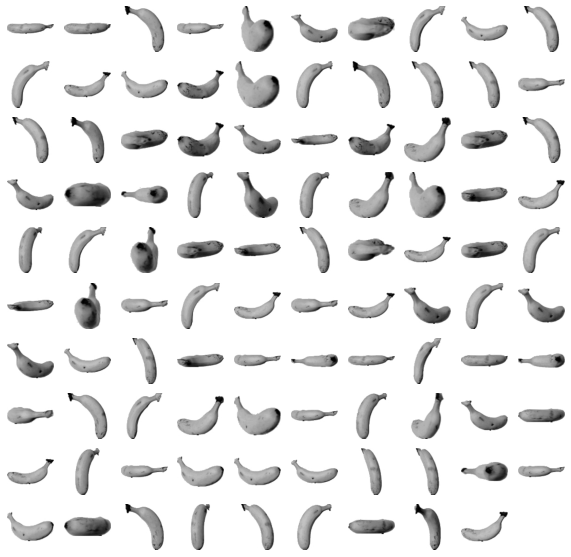

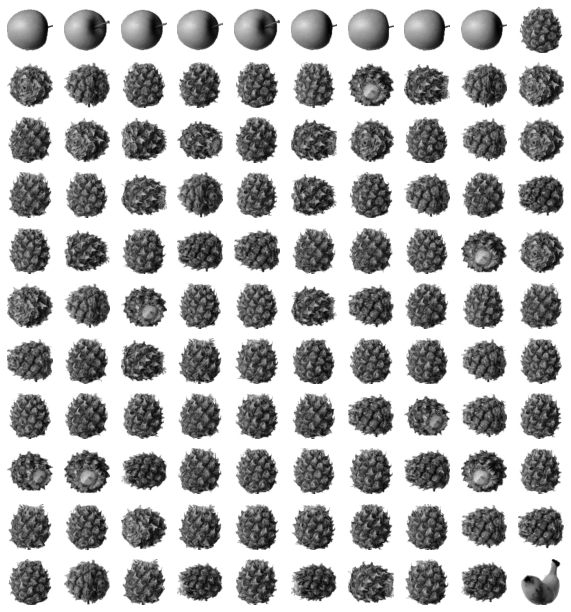

In [ ]:
for label in range(0, 3):
  draw_fruits(fruits[km.labels_ == label])
  print('\n')

**훈련 데이터의 차원을 줄이면 시각화가 가능해진다.** 3개 이하로 차원을 줄이면 화면에 출력하기 비교적 쉽다. fruits_pca는 2차원으로 표현이 가능하다. km.labels_를 사용해 클러스터별로 산점도를 그려보자.

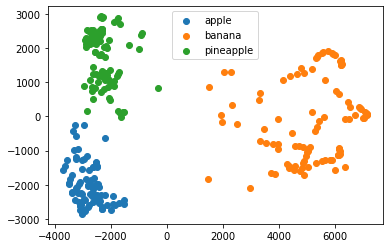

In [ ]:
for label in range(0, 3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:, 0], data[: ,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

# 정리

핵심 포인트 
* 차원 축소: **원본 데이터의 특성을 적은 수의 새로운 특성으로 변환하는 비지도 학습의 한 종류**이다. 저장 공간을 줄이고 시각화하기 쉽다. 또한 다른 알고리즘의 성능을 높일 수 있다.
* 주성분 분석: 차원 축소 알고리즘이다. **데이터에서 가장 분산이 큰 방향을 찾는다.** 이런 방향을 주성분이라한다. 원본 데이터를 주성분에 투영하여 새로운 특성을 만들 수 있다. 일반적으로 주성분은 원본 데이터에 있는 특성 개수보다 작다.
* 설명된 분산: **주성분이 얼마나 원본 데이터의 분산을 잘 나타내는지 기록한 것**이다. 사이킷런의 PCA 클래스는 주성분의 개수나 설명된 분산의 비율을 지정하여 주성분 분석을 수행할 수 있다.

핵심 패키지와 함수

scikit-learn
* PCA: **주성분 분석을 수행하는 클래스**이다. **n_components**는 주성분의 개수를 지정한다. 기본값은 None으로 샘플 개수와 특성 개수 중에 작은 것의 값을 사용한다. **random_state**에는 넘파이 난수 시드 값을 지정할 수 있다. **components_ 속성**에는 훈련 세트에서 찾은 주성분이 저장된다. **explained_variance_ 속성**에는 설명된 분산이 저장되고, **explained_variance_ratio**에는 설명된 분산의 비율이 저장된다. **inverse_transform() 메서드**는 **transform() 메서드**로 차원을 축소시킨 데이터를 다시 원본 차원으로 복원한다.